In [1]:
import pandas as pd

In [2]:
df_clean = pd.read_csv('/content/dados_tratados.csv')

In [3]:
df_clean.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## <font color='ciano'>Remoção de Colunas Irrelevantes

In [4]:
df_clean.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total', 'daily_charges'],
      dtype='object')

In [5]:
df_clean.head()

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [6]:
for col in df_clean.columns:
  if df_clean[col].nunique() == 1:
    print(f'Coluna {col} é irrelevante: {df_clean[col].unique()}')

## <font color='ciano'>Verificação da Proporção de Evasão

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
proporcao_churn = df_clean['churn'].value_counts(normalize=True) * 100
proporcao_churn.round(2)

,proportion
churn,
No,73.42
Yes,26.58


/tmp/ipython-input-9-2865207398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


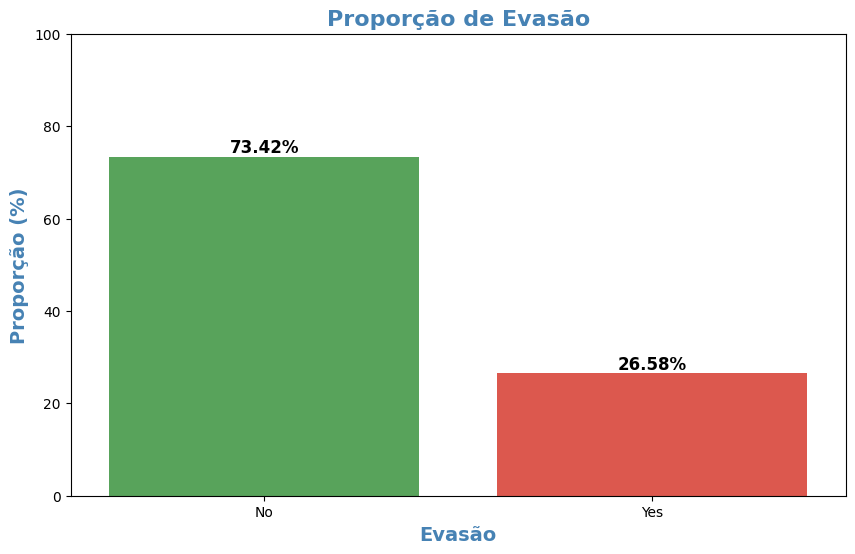

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=proporcao_churn.index,
    y=proporcao_churn.values,
    palette= ['#4caf50', '#f44336']
    )
plt.title('Proporção de Evasão', fontsize=16, weight='bold', color='steelblue')
plt.xlabel('Evasão', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Proporção (%)', fontsize=14, weight='bold', color='steelblue')
plt.ylim(0, 100)

for i, v in enumerate(proporcao_churn.values):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=12, weight='bold')

plt.show()

In [10]:
df_clean['churn'] = df_clean['churn'].map({'No': 0, 'Yes': 1})
df_clean

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_charges
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7028,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7029,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7030,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [11]:
x = df_clean.drop('churn', axis=1)
y = df_clean['churn']

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='inner', axis=1, fill_value=0)
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_encoded, y_train)

print("Formato dos dados de treinamento originais: ", x_train.shape)
print("Formato dos dados de treinamento balanceados: ", x_train_smote.shape)
print("Formato dos rótulos de treinamento originais: ", y_train.shape)
print("Formato dos rótulos de treinamento balanceados: ", y_train_smote.shape)

Formato dos dados de treinamento originais:  (5625, 21)
Formato dos dados de treinamento balanceados:  (8260, 45)
Formato dos rótulos de treinamento originais:  (5625,)
Formato dos rótulos de treinamento balanceados:  (8260,)


## <font color='ciano'>Verificando Normalização ou Padronização

In [15]:
col_numericas = x_train_encoded.select_dtypes(include=['int64', 'float64']).columns
col_numericas

Index(['senior_citizen', 'tenure', 'charges_monthly', 'charges_total',
       'daily_charges'],
      dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
x_train_encoded_scaled = x_train_encoded.copy()
x_test_encoded_scaled = x_test_encoded.copy()

x_train_encoded_scaled[col_numericas] = scaler.fit_transform(x_train_encoded[col_numericas])
x_test_encoded_scaled[col_numericas] = scaler.transform(x_test_encoded[col_numericas])

## <font color='ciano'>Análise de Correlação

In [18]:
df_numerico = df_clean.select_dtypes(include=['int64', 'float64'])
correlacao = df_numerico.corr()

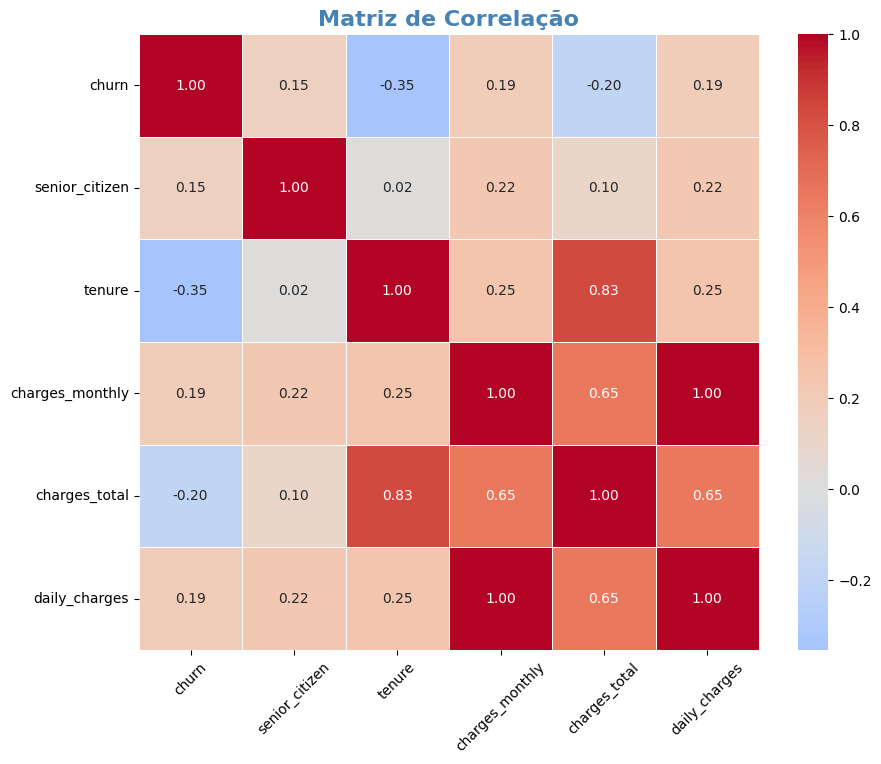

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16, weight='bold', color='steelblue')
plt.xticks(rotation=45)
plt.show();

In [20]:
corr_churn = correlacao['churn'].drop('churn')
corr_ordenada = corr_churn.abs().sort_values(ascending=False)
print(f'Colunas mais correlacionadas com churn:\n{corr_ordenada}')

Colunas mais correlacionadas com churn:
tenure             0.354049
charges_total      0.199484
daily_charges      0.192914
charges_monthly    0.192858
senior_citizen     0.150541
Name: churn, dtype: float64


In [21]:
limiar = 0.2
var_select = corr_ordenada[corr_ordenada.abs() >= limiar].index.tolist()
print(f'Variáveis selecionadas com base na correlação: {var_select}')

Variáveis selecionadas com base na correlação: ['tenure']


In [22]:
x_train_corr = x_train_encoded_scaled[var_select]
x_test_corr = x_test_encoded_scaled[var_select]
x_train_corr_sem_escala = x_train_encoded[var_select]
x_test_corr_sem_escala = x_test_encoded[var_select]

## <font color='ciano'>Análises Direcionadas

/tmp/ipython-input-23-1325517975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=df_clean, palette=['#4caf50', '#f44336'])


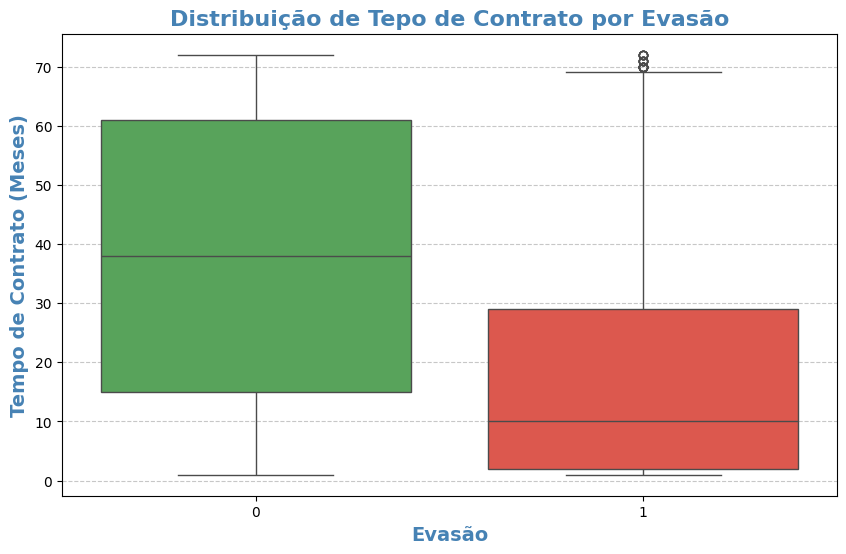

In [23]:
# Gráfico: Tempo de contrato x evasão

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tenure', data=df_clean, palette=['#4caf50', '#f44336'])
plt.title('Distribuição de Tepo de Contrato por Evasão', fontsize=16, weight='bold', color='steelblue')
plt.xlabel('Evasão', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Tempo de Contrato (Meses)', fontsize=14, weight='bold', color='steelblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-24-1525800557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='charges_total', data=df_clean, palette=['#4caf50', '#f44336'])


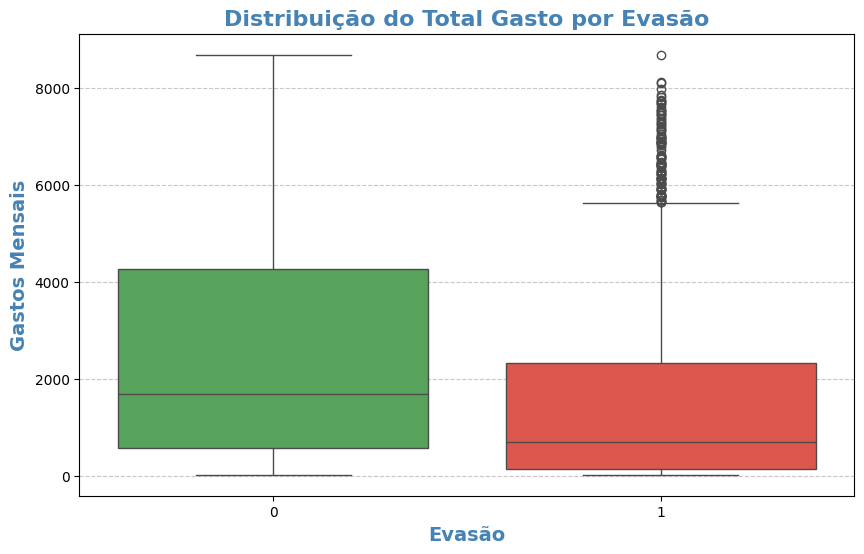

In [24]:
# Gráfico: Total gasto x evasão

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='charges_total', data=df_clean, palette=['#4caf50', '#f44336'])
plt.title('Distribuição do Total Gasto por Evasão', fontsize=16, weight='bold', color='steelblue')
plt.xlabel('Evasão', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Gastos Mensais', fontsize=14, weight='bold', color='steelblue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

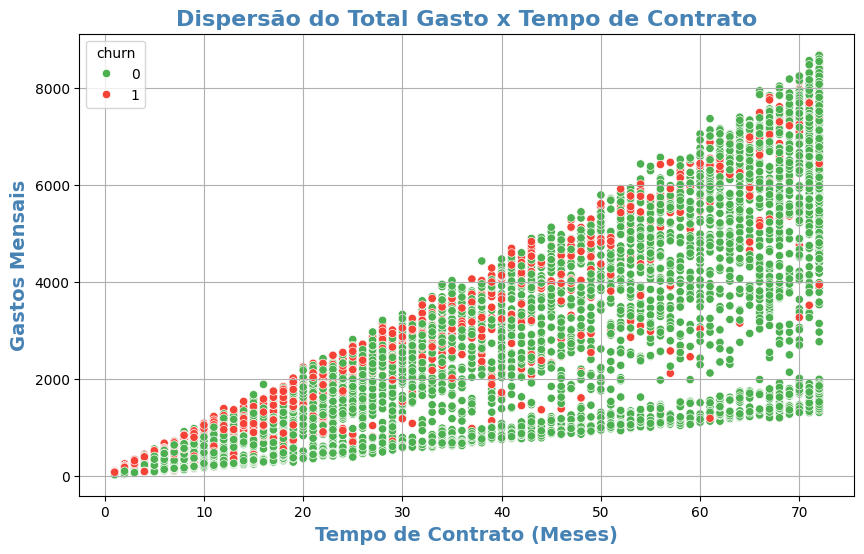

In [25]:
# Gráfico: Dispersão com tendência

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='charges_total', hue='churn', data=df_clean, palette=['#4caf50', '#f44336'])
plt.title('Dispersão do Total Gasto x Tempo de Contrato', fontsize=16, weight='bold', color='steelblue')
plt.xlabel('Tempo de Contrato (Meses)', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Gastos Mensais', fontsize=14, weight='bold', color='steelblue')
plt.grid(True)
plt.show()

## <font color='ciano'>Criação de Modelos

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)
y_pred_rf = rf.predict(x_test_encoded)

print(f'Acurácia do Modelo Random Forest: {accuracy_score(y_test, y_pred_rf)}')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred_rf)}')
print(f'Matriz de Confusão:\n{confusion_matrix(y_test, y_pred_rf)}')

Acurácia do Modelo Random Forest: 0.7867803837953091
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusão:
[[906 127]
 [173 201]]


In [28]:
rl = LogisticRegression(max_iter=1000, random_state=42)
rl.fit(x_train_smote, y_train_smote)
y_pred_rl = rl.predict(x_test_encoded)

print(f'Acurácia do Modelo Regressão Logística: {accuracy_score(y_test, y_pred_rl)}')
print(f'Relatório de Classificação:\n{classification_report(y_test, y_pred_rl)}')
print(f'Matriz de Confusão:\n{confusion_matrix(y_test, y_pred_rl)}')

Acurácia do Modelo Regressão Logística: 0.7938877043354655
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.58      0.60       374

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Matriz de Confusão:
[[899 134]
 [156 218]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## <font color='ciano'>Avaliação dos Modelos

In [29]:
def avaliar_modelo(modelo, y_true, y_pred):
  print(f'Avaliação - {modelo}')
  print(f'Acurácia: ', round(accuracy_score(y_true, y_pred) * 100, 2), '%')
  print(f'Relatório de Classificação:\n{classification_report(y_true, y_pred)}')
  print(f'Matriz de Confusão:\n{confusion_matrix(y_true, y_pred)}')

In [30]:
avaliar_modelo('Random Forest', y_test, y_pred_rf)

Avaliação - Random Forest
Acurácia:  78.68 %
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusão:
[[906 127]
 [173 201]]


In [31]:
avaliar_modelo('Regressão Logística', y_test, y_pred_rl)

Avaliação - Regressão Logística
Acurácia:  79.39 %
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.58      0.60       374

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407

Matriz de Confusão:
[[899 134]
 [156 218]]


In [32]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

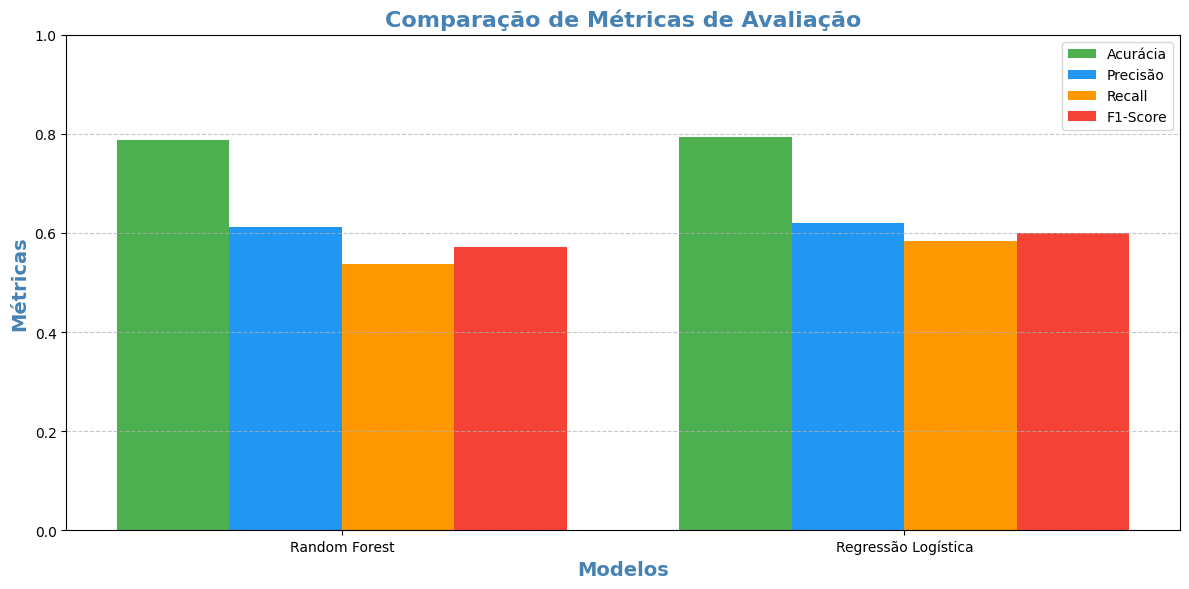

In [33]:
modelos = ['Random Forest', 'Regressão Logística']
acuracia = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_rl)]
precisao = [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rl)]
recall = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rl)]
f1 = [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rl)]

resultados = np.arange(len(modelos))
largura = 0.2

plt.figure(figsize=(12, 6))
plt.bar(resultados - 1.5 * largura, acuracia, width=largura, label='Acurácia', color='#4caf50')
plt.bar(resultados - 0.5 * largura, precisao, width=largura, label='Precisão', color='#2196f3')
plt.bar(resultados + 0.5 * largura, recall, width=largura, label='Recall', color='#ff9800')
plt.bar(resultados + 1.5 * largura, f1, width=largura, label='F1-Score', color='#f44336')

plt.xticks(resultados, modelos)
plt.xlabel('Modelos', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Métricas', fontsize=14, weight='bold', color='steelblue')
plt.title('Comparação de Métricas de Avaliação', fontsize=16, weight='bold', color='steelblue')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

## <font color='ciano'>Análise de Importância das Variáveis

In [45]:
importancia_rf = rf.feature_importances_
colunas = x_train_smote.columns

In [46]:
df_importancia_rf = pd.DataFrame({'Variável': colunas, 'Importância': importancia_rf})
df_importancia_rf = df_importancia_rf.sort_values(by='Importância', ascending=False)

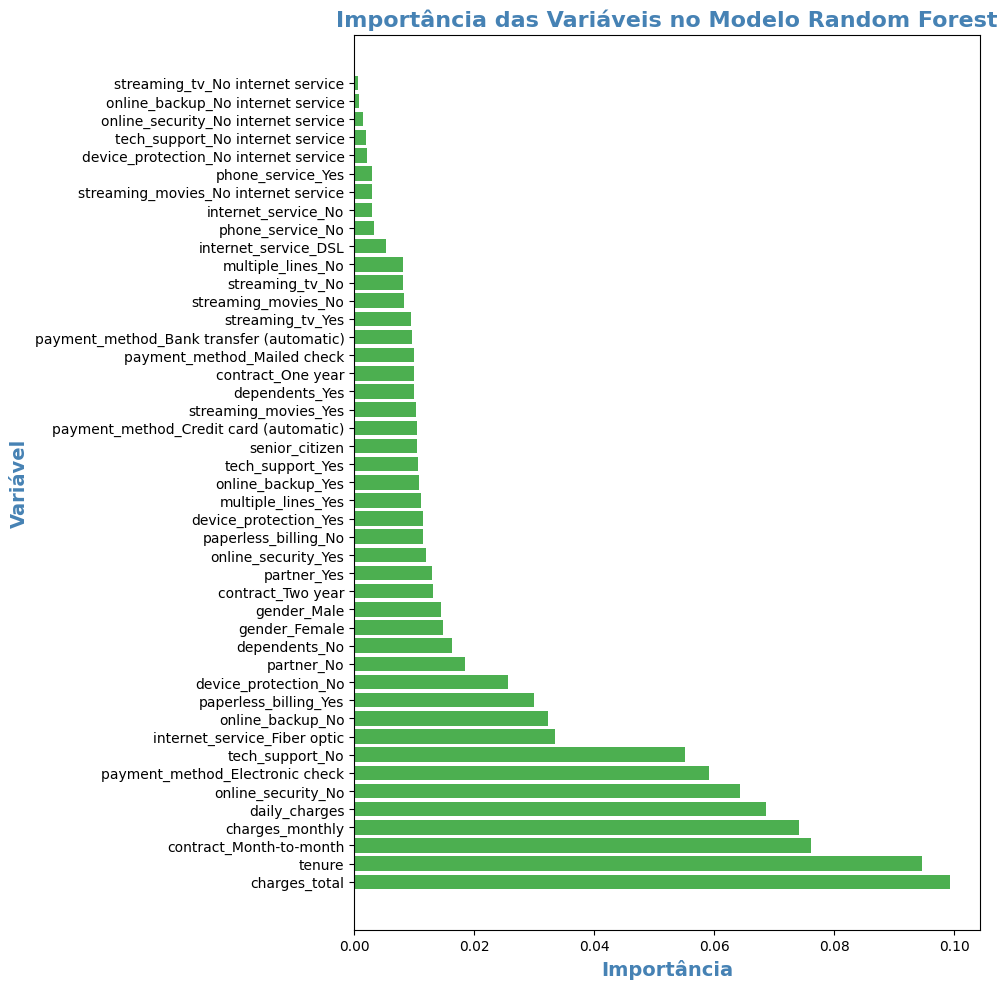

In [47]:
plt.figure(figsize=(10, 10))
plt.barh(df_importancia_rf['Variável'], df_importancia_rf['Importância'], color='#4caf50')
plt.xlabel('Importância', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Variável', fontsize=14, weight='bold', color='steelblue')
plt.title('Importância das Variáveis no Modelo Random Forest', fontsize=16, weight='bold', color='steelblue')
plt.tight_layout()
plt.show();

In [48]:
coef = rl.coef_[0]
colunas = x_train_smote.columns
df_coef_rl = pd.DataFrame({'Variável': colunas, 'Coeficiente': coef})
df_coef_rl = df_coef_rl.sort_values(by='Coeficiente', ascending=False)

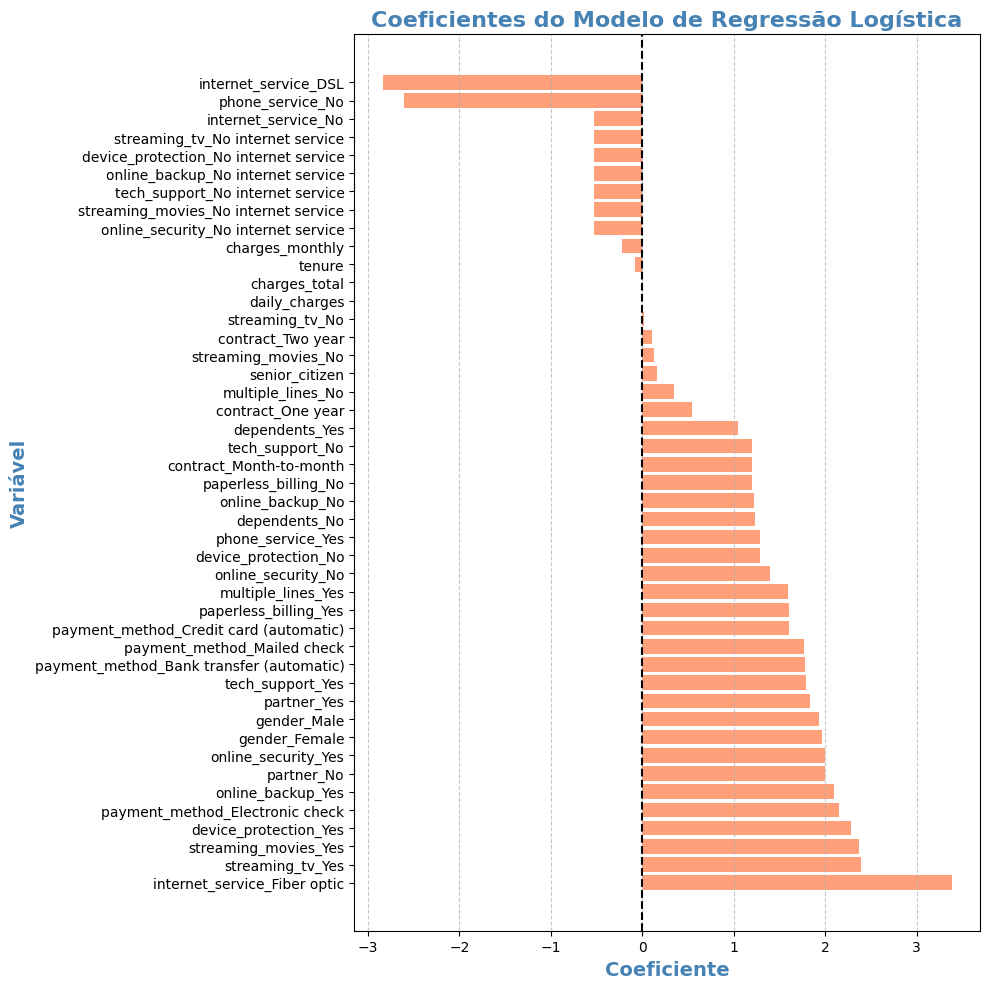

In [50]:
plt.figure(figsize=(10, 10))
plt.barh(df_coef_rl['Variável'], df_coef_rl['Coeficiente'], color='#ffa07a')
plt.title('Coeficientes do Modelo de Regressão Logística', fontsize=16, weight='bold', color='steelblue')
plt.xlabel('Coeficiente', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Variável', fontsize=14, weight='bold', color='steelblue')
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
from sklearn.inspection import permutation_importance

In [52]:
resultados_perm = permutation_importance(rl, x_test_encoded, y_test, n_repeats=10, random_state=42)
df_knn = pd.DataFrame({'Importância': resultados_perm.importances_mean, 'Variável': x_test_encoded.columns})
df_knn = df_knn.sort_values(by='Importância', ascending=False)

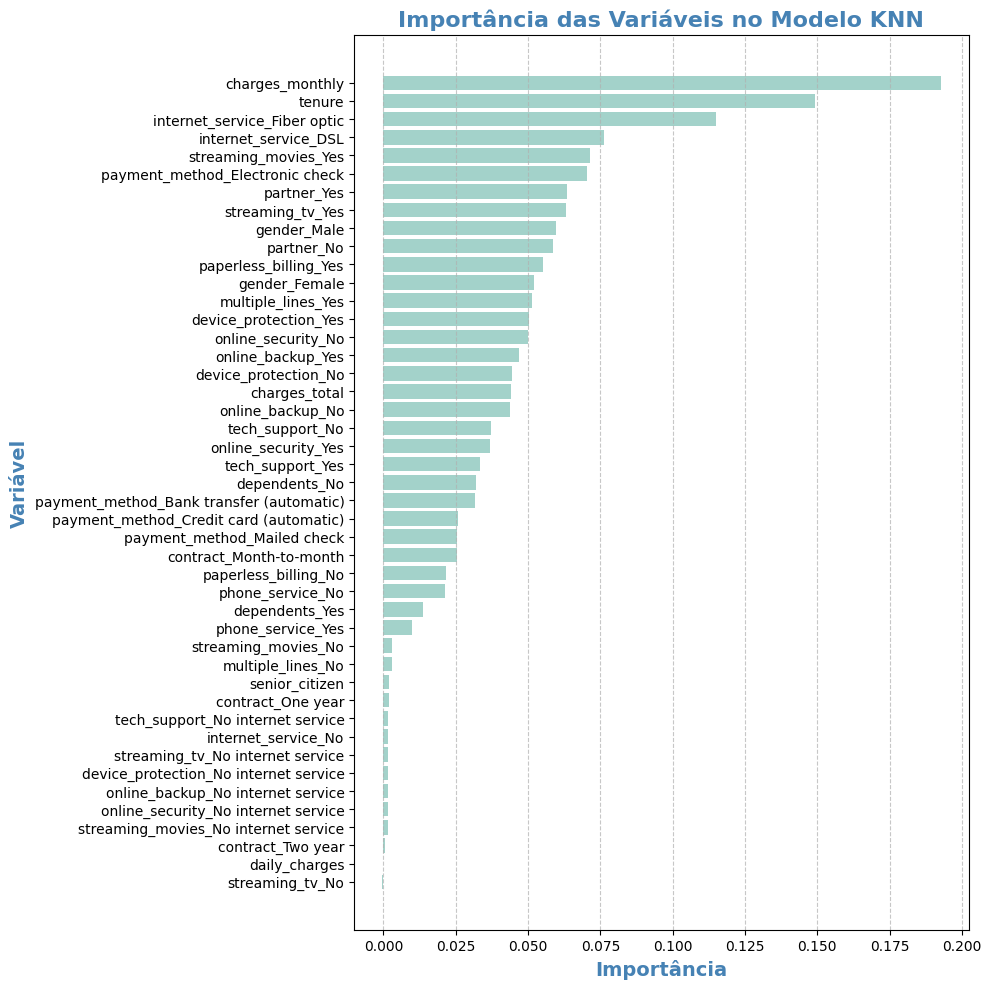

In [53]:
plt.figure(figsize=(10, 10))
plt.barh(df_knn['Variável'], df_knn['Importância'], color='#a3d2ca')
plt.title('Importância das Variáveis no Modelo KNN', fontsize=16, weight='bold', color='steelblue')
plt.xlabel('Importância', fontsize=14, weight='bold', color='steelblue')
plt.ylabel('Variável', fontsize=14, weight='bold', color='steelblue')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

In [54]:
df_comparativo = pd.DataFrame({
    'Variável': x_test_encoded.columns,
    'Random Forest': rf.feature_importances_,
    'Regressão Logística': rl.coef_[0],
    'KNN': resultados_perm.importances_mean
})

In [56]:
df_comparativo['Média'] = df_comparativo[['Random Forest', 'Regressão Logística', 'KNN']].mean(axis=1)
df_comparativo = df_comparativo.sort_values(by='Média', ascending=False)
display(df_comparativo.drop(columns='Média').round(4))

,Variável,Random Forest,Regressão Logística,KNN
16,internet_service_Fiber optic,0.0335,3.3806,0.1151
32,streaming_tv_Yes,0.0095,2.3926,0.0630
35,streaming_movies_Yes,0.0103,2.3644,0.0714
26,device_protection_Yes,0.0115,2.2806,0.0502
43,payment_method_Electronic check,0.0592,2.1508,0.0703
23,online_backup_Yes,0.0107,2.0954,0.0469
7,partner_No,0.0185,2.0020,0.0587
20,online_security_Yes,0.0120,1.9960,0.0367
5,gender_Female,0.0147,1.9647,0.0520
6,gender_Male,0.0145,1.9362,0.0597


## <font color='rocket'>Conclusão

# <font color='red'>Relatório Final

1.   **Objetivo do Projeto**

  Foi desenvolver modelos preditivos capazes de identificar clientes com maior propensão a evasão.
2.   **Pré-processamento dos Dados**
  *   Remoção das colunas irrelevantes.
  *   Tratamento de valores ausentes e incosistentes.
  *   Codificação de variáveis categóricas e normalização.
  *   Análise de balanceamento.
3. **Análise de Correlação e Seleção das Variáveis**
  *   tenure: quanto menor o tempo, maior a evasão.
  *   charges_monthly e charges_total: clientes com fatura mensal alta e pouco tempo de contrato tendem a evadir mais.
  *   contract e payment_method: contratos mensais com cartão virtual tem maior taxa de evasão.
  *    tech_support, online_backup, device_protection: também aparecem com relevância moderada.

4. **Modelagem Preditiva**
  *   Random Forest teve o melhor desempenho geral.
  *   Matriz de Confusão e gráficos de classificação mostraram boa separação entre classes, mas indicaram um underfitting para KNN e leve overfitting para Random Fores.

5. **Conclusão Estratégicas**

  *   Clientes com pouco tempo de contrato são mais propensos a evadir.
  *   Planos mensais altas e aumentam consideravelmente a taxa de churn.
  *   Faturas mensais altas e pagamentos com CV se correlacionam com evasão.

6. **Recomendações de Retenção**

  *   Campanhas de engajamento nos primeiros meses de contrato.
  *   Descontos progressivos ou bõnus de fidelidade.
  *   Facilitar pagamentos tradicionais.
  *   Sistema de alerta interno para identificar e intervir com clientes de alto risco.

















